In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


vision全部載せ①

iVBORw0KGgoAAAANSUhEUgAAAlgAAAJYCAIAAAAxBA+LAAEAAElEQVR4nOyddVhUzffAZ4Pu7gbpbmlJFRW7u7s7X7u7FRVsBFRQUEGQEinp7u6O7b2/P67uuxLLJuD7/X0eH5/lzsyZWdi9586ZEwCiAxKBkHTh/FNrq7Lw8EE7zJ01Cw2AhakpPdL+LsJXLv+6dQv8evPGjffv3h3d9YxZmjIzHxsbthUVMS0Bj8ePt7Ye+7/hqqqqhPh4AoEwsAnT2vpsvE11XNzIr4oeMtLTZ0ybpqetnRAfz0axhYFvXjg5kIjElKtXntvbEbEYNgpnkebmZllJyY6ODrZLfmxi1F1TE+wztSQ0hO3CmYaIw/ka6IUEBKgpKVVXV3N6utxnT99M9CTicKnXrkZu2Txs/7fTfUo/fmDX7D09PeM0NOJiY1kXhQR0gESjrXbtdjp37vvJ499PHCfhcP06rN+4EQCQkZ6empJCj8C/hbofP1pycscfOQr/qKioWF9fP7pLGrOUfQoXUVMT09JiWsKJf/5RUVFZvXYtG1fFCZSUlMbb2aHR6IFNPXV1AAAZE5ORXhN9GJuYBL17d/nq1SULF+7cvr29vZ1dkiES6fOqldXfvk3290fx8LJLLOs8vH9/1pw5IiIibJcsKCdX+z1BZYJrdUwM24UzDYqbu52Xd/3GjcHv3ysqKnJ6Ou3ZczAtLV1VVbLm5pVfI7HtbbT7j5s5s/DNG3bNvm/PHq+JE+0dHFgXRZcihFFycvYJDG4vKgpdOL+zooK6ycnZWVdPDwDg+/Ah62saI5BwuPgjh7RnzeIVF4evSEpKNjc3j+6qxiYQmVz5NVJjsjfTEnJzcp48enTt5k02rmrkwXV1onh4uQQFR3shtPD08krLzCQSifra2ndu3WJRGgmPLw4JwXV28svITH31SkRNnS2LZAtEIvH+3bvr1q/nhHCF8Xa9DQ08YmKEvj5OyGcOHA53p6R035o1JqamIzAd

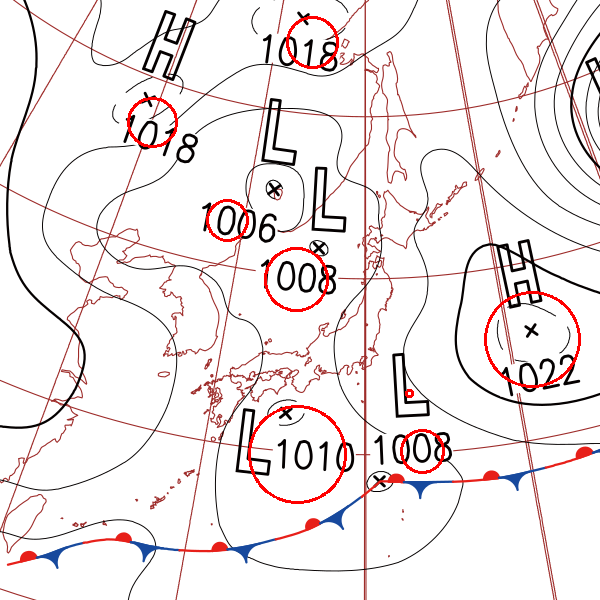


入力された画像は2022年5月1日9時の天気図です。
処理のstep1で赤い円の気圧は一つも漏らすことなく必ず認識してください。
赤い円から読み取ったことを明記してください。

#命令文
入力された天気図の画像をもとに、以下の処理を、step-by-stepで処理をしてください。
stepは全部で5個あります。必ず最後まで処理を行なってください。
日本語を出力してください。

#処理
1. 画像内の気圧の大きさと位置をすべて正確に特定してください。画像内の前線の種類と位置を正確に特定してください。日本の位置は、画像の中心である、縦横ちょうど真ん中だと定義します。エリアを5分割し、日本の北(画像上部、中心より上)、日本の南（画像下部、中心より下）、日本の東（画像右部、中心よりも右）、日本の西（画像左部、中心よりも左）、日本上空（画像中央、中心）と定義して、それぞれの気圧の位置を文章で箇条書きで出力してください。

2. 気圧と前線の位置関係から、どのような気圧配置かを分析してください。

3. 気圧の位置と気圧配置から、気圧の影響が日本の主要地域（北海道、東北、関東、中部、近畿、中国・四国、九州、沖縄）にどのような影響を与えているかについて具体的に解説してください。

4. これまでに分析した内容から、各地方（北海道、東北、関東、中部、近畿、中国・四国、九州、沖縄）の天気概況を、それぞれ作成してください。

5. 最後に、step1からstep4までの情報を元に以下の条件で、入力した天気図の天気概況のコメントを生成してください。
・後に書いている15個の例文（書き方のみを参考にしてください）のような書き方
・体言止めが使われており、専門家のような口調である。
・この文章は予報ではなく現状の天気図の時点での気象を示すコメントなので、「〜か」「〜だろう」「〜の模様」などの曖昧な表現はしないで、情報を断定し言い切りの口調にしてください。
・必ずトークン数ではなく日本語の文字数で、95文字の文字数のコメントを生成してください。句読点やひらがな、漢字1文字は1文字と数えてください。
・日本語の文章であること。
・年月日はコメント内に含まなくて良いです。
・気象情報以外の余計な文章をいれないでください。

#15個の例文
例1の文章
```
2020年 1月1日(水)太平洋側は

In [7]:
import requests
from datetime import datetime
import base64
import json
import re
from IPython.display import Image, display
import base64
from io import BytesIO

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode('utf-8')
    print(encoded_image)
    # Base64エンコードされたデータをデコードし、バイト列に変換
    image_data = base64.b64decode(encoded_image)
    # バイト列から画像を生成
    image = Image(data=image_data)
    # 画像を表示
    display(image)
    return encoded_image

image_path = "/content/drive/My Drive/研究用/2023_12_調査ノート/天気図/20220501.png"
base64_image = encode_image(image_path)

match = re.search(r'(\d{4})(\d{2})(\d{2})\.png$', image_path)
if match:
    year, month, day = match.groups()
    year, month, day = int(year), int(month), int(day)
    date = f"{int(year)}年{int(month)}月{int(day)}日"
    formatted_date_int = f"{year}-{month}-{day}"
else:
    print("画像ファイル名から日付を解析できませんでした。")

weather_date = date
formatted_date = f"{year}-{month}-{day}"

# ファイルを読み込むための関数
def read_file(file_path):
    try:
        with open(file_path, "r") as file:
            return file.read()
    except IOError:
        return "ファイルが読み込めませんでした。"

weather_date = date

# instruction 変数にインストラクションのファイル内容を格納
instruction_file_path = "/content/drive/My Drive/研究用/2023_12_調査ノート/プロンプト文/gpt/v2_instruction.txt"
instruction = read_file(instruction_file_path)

text = f"""
入力された画像は{weather_date}9時の天気図です。
処理のstep1で赤い円の気圧は一つも漏らすことなく必ず認識してください。
赤い円から読み取ったことを明記してください。

{instruction}
"""

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4-vision-preview",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": f"{text}"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/png;base64,{base64_image}",
            "detail": "high"
          }
        }
      ]
    }
  ],
  "max_tokens": 3500
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

print(text)

if response.status_code == 200:
    print(response)
    formatted_response = json.dumps(response.json(), indent=4, ensure_ascii=False)
    print(formatted_response)
    result = response.json()["choices"][0]["message"]["content"]
    print(result)
else:
    print(f"APIリクエストに失敗しました: ステータスコード {response.status_code}")